<a href="https://colab.research.google.com/github/chipojaya1/myNEBDHub/blob/main/DSP_Movie_Reviews_Analysis_Chipo_Jaya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



<h1 align="center">
    NSDC Data Science Projects
</h1>
  
<h2 align="center">
    Project: Sentiment Analysis of Movie Reviews
</h2>

<h3 align="center">
    Name: Chipo Jaya
</h3>


### **Please read before you begin your project**

**Instructions: Google Colab Notebooks:**

Google Colab is a free cloud service. It is a hosted Jupyter notebook service that requires no setup to use, while providing free access to computing resources. We will be using Google Colab for this project.

Certain parts of this project will be completed individually, while other parts are encouraged to be completed with the rest of your team. In order to work within the Google Colab Notebook, **please start by clicking on "File" and then "Save a copy in Drive."** This will save a copy of the notebook in your personal Google Drive. Each member of your team should work on their personal copy.

Please rename the file to "DSP - Movie Reviews Analysis - Your Full Name." Once this project is completed, you will be prompted to share your file with the National Student Data Corps (NSDC) Project Leaders.

You can now start working on the project. :)

**Project Description:**

This project will introduce students to an array of skills as they strive to create a sentiment analysis model to classify a given review as positive or negative. Sentiment Analysis leverages both Natural Language Processing and Machine Learning skills - how to represent text in a machine-understandable format so as to classify the text and extract sentiment. We will also cover visualizations and how to deploy models in the real world.

[Use this link to join the NSDC DSP Slack Channel!](https://bit.ly/nsdc-dsp-movie-reviews)


---
---



<h3 align = "center">
    Milestone #1
</h3>

NOTE: These steps are to be completed **individually**, not as a team. You are encouraged to discuss steps with your teammates. Please attend Office Hours or ask your questions on Slack.

GOAL: The main goal of this milestone is to set up your environment, install the required packages, learn how to acces data and do some basic exploratory data analysis.

**Step 1:**

Setting up libraries and installing packages

To install a library:
```python
 import <library> as <shortname>
```
We use a *short name* since it is easier to refer to the package to access functions and also to refer to subpackages within the library.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize,sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


These are the libraries that will help us throughout this project. It is not necessary that you know what each library does, but you can always look it up.

We encourage you to read more about the important and most commonly used packages like Pandas and Natural Language Toolkit (NLTK) and write a few lines in your own words about what they do. [You may use the Data Science Resource Repository (DSRR) to find resources to get started!](https://nebigdatahub.org/nsdc/data-science-resource-repository/)



<h4 style="color:orange">
    TO-DO
</h4>

Write a few lines about what each library does.

- **Pandas:** A library for data manipulation which is used to load data from excel files, clean it, explore it, and prepare it for the next steps. It's the foundation for organizing and managing textual data efficiently.


- **NLTK:** a library called Natural Language Toolkit (NLTK) and it is a comprehensive library for working with human language data (text). It comes with built-in resources like sentiment lexicons (e.g., VADER) and can do and so much more:

   1. Tokenization: Splitting sentences and paragraphs into individual words or tokens.

    2. Stopword Removal: Filtering out common but low-meaning words like "the," "is," and "and."

    3. Stemming/Lemmatization: Reducing words to their base or root form (e.g., "running" becomes "run").

    4. Part-of-Speech Tagging: Identifying nouns, verbs, adjectives, etc., which can be useful for analysis.


---

**Step 2:**

Let’s access our data. We will be using the Internet Movie Database (IMDb) as our dataset. The dataset contains 50,000 movie reviews from the Internet Movie Database. Reviews have been pre-labeled with sentiment polarity (positive/negative).  


[The IMDb Movie Reviews dataset is available at this link](https://raw.githubusercontent.com/meghjoshii/NSDC_DataScienceProjects_SentimentAnalysis/main/IMDB%20Dataset.csv). It is better to use the link provided directly within the read_csv function.



We will use pandas to read the data from the csv file using the `read_csv` function. This function returns a pandas dataframe. We will store this dataframe in a variable called `df`.

In [3]:
# TODO: Read the data using pandas read_csv function

# Load the dataset from the provided URL
df = pd.read_csv('https://raw.githubusercontent.com/meghjoshii/NSDC_DataScienceProjects_SentimentAnalysis/main/IMDB%20Dataset.csv')

print("Dataset loaded from url!")
print(f"Dataset shape: {df.shape}")  # (number_of_reviews, number_of_columns)
print(f"Number of reviews: {df.shape[0]:,}")
print(f"Number of columns: {df.shape[1]}")


Dataset loaded from url!
Dataset shape: (50000, 2)
Number of reviews: 50,000
Number of columns: 2


---

**Step 3:**

Let's see what the data looks like. We can use the `head` function which returns the first 5 rows of the dataframe.

In [4]:
# TODO: Print the first 5 rows of the data using head function of pandas
print("First 5 reviews")
df.head()

First 5 reviews


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


There are 2 columns in the dataframe - `review` and `sentiment`. The `review` column contains the text of the review and the `sentiment` column contains the sentiment of the review.

The `describe()` function gives us a summary of the data.

In [5]:
# TODO: Describe the data using describe function of pandas
print("Dataset summary")
df.describe()

Dataset summary


,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


We can see that we have 50,000 reviews in our dataset. The `sentiment` column has 2 unique values - `positive` and `negative`.

Individual columns can be accessed using the `[]` operator. For example, `df['review']` returns the `review` column of the dataframe.

In [6]:
print(df['review'])

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object


Let's see how many positive and negative reviews we have in our dataset. We can use the `value_counts()` function to get the count of each unique value in the `sentiment` column.

In [7]:
# TODO: Use the value_counts function to count the number of positive and negative reviews on the sentiment column using the [] operator
print("Number of positive and negative reviews")
print(df['sentiment'].value_counts())

print("\nSentiment distribution (percentages)")
print(df['sentiment'].value_counts(normalize=True) * 100)

Number of positive and negative reviews
sentiment
positive    25000
negative    25000
Name: count, dtype: int64

Sentiment distribution (percentages)
sentiment
positive    50.0
negative    50.0
Name: proportion, dtype: float64


We can see that we have 25,000 positive reviews and 25,000 negative reviews in our dataset. They are evenly distributed and we do not have to worry about class imbalance.

[Follow this link to learn more about class imbalance](https://machinelearningmastery.com/what-is-imbalanced-classification/).

In [8]:
print("\n--- Sample Reviews ---")
print("Sample positive review:")
print(df[df['sentiment'] == 'positive']['review'].iloc[0][:500] + "...")  # First 500 chars

print("\nSample negative review:")
print(df[df['sentiment'] == 'negative']['review'].iloc[0][:500] + "...")  # First 500 chars

print("\n--- Review length statistics ---")
df['review_length'] = df['review'].str.len()
print(f"Average review length: {df['review_length'].mean():.0f} characters")
print(f"Shortest review: {df['review_length'].min()} characters")
print(f"Longest review: {df['review_length'].max()} characters")


--- Sample Reviews ---
Sample positive review:
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ...

Sample negative review:
Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing 


---

**Step 4:**
Let's take a short break from coding and do some reading that is imperative to understand the concepts of this project.


The **objective** of our machine learning model will be to predict the sentiment of a review given the text of the review. So, the model needs to learn the relationship between the text of the review and the sentiment of the review. Hence, this is a supervised learning problem where the input is text and the output is a label.

[Click here to watch introductory videos and learn more about supervised machine learning](https://www.youtube.com/playlist?list=PLNs9ZO9jGtUCiGTo3iP0qmI9_qi8oYaRN).



Since we are going to be using text as input, we cannot directly use the text because computers do not understand text. We need to convert the text into a format that is useful for our classification model.

Count vectorization is a method to convert text into a format that is useful for classification models. It converts the text into a matrix of token counts meaning that each row in the matrix represents a review and each column represents a word. The value in each cell is the number of times that word occurs in that review. So, by learning the frequency of each word in each review, the model can learn the relationship between the text and the sentiment of the review. The intuition behind this is that positive reviews will have more positive words and negative reviews will have more negative words.

Now that we have established the intuition behind count vectorization, let's look at features of the count vectorizer. The features of the count vectorizer are the words that we want to consider. We would only want to use words that are relevant to the sentiment of the review. For example, if we are classifying reviews of movies, we would not want to consider words like `the`, `a`, `an` etc. because they are not relevant to the sentiment of the review. Also, we would want to consider words that occur frequently in the reviews. For example, if a word occurs only once in the entire dataset, it is not very useful for our model.

To remove words that are not relevant to the sentiment of the review, first we need to tokenize the text.

Tokenization is the process of splitting a string into a list of tokens. This helps us to break down the text into smaller chunks which are easier to work with. What we essentially want to do  is remove all the punctuation and special characters from the text because they do not add any value to the text. We also want to convert all the text to lowercase so that the model does not treat the same word with different cases as different words.

---
---



<h3 align = "center">
    Milestone #2
</h3>

NOTE: These steps are to be completed **individually**, not as a team. You are encouraged to discuss steps with your teammates. Please attend Office Hours or ask your questions on Slack.

GOAL: The main goal of this milestone is to learn natural langauge processing and how to use the NLTK library to preprocess text. We will also learn how to use the CountVectorizer class to convert text into a format that is useful for classification models.

**Step 1:**

We will use the `nltk` library to perform these preprocessing steps. First, we will use the `word_tokenize` function to tokenize the text.

In [9]:
import nltk
from nltk.tokenize import word_tokenize

# Download the punkt tokenizer
nltk.download('punkt')
nltk.download('punkt_tab') # Download the missing 'punkt_tab' resource

# Apply word_tokenize to the 'review' column and create a new column for tokens
df['review_tokens'] = df['review'].apply(word_tokenize)

print("Tokenization completed!")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Tokenization completed!


In [10]:
# We can see that the `review` column now contains a list of tokens for each review. Let's see what the first review looks like.
df['review_tokens'][1]

['A',
 'wonderful',
 'little',
 'production',
 '.',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'The',
 'filming',
 'technique',
 'is',
 'very',
 'unassuming-',
 'very',
 'old-time-BBC',
 'fashion',
 'and',
 'gives',
 'a',
 'comforting',
 ',',
 'and',
 'sometimes',
 'discomforting',
 ',',
 'sense',
 'of',
 'realism',
 'to',
 'the',
 'entire',
 'piece',
 '.',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'The',
 'actors',
 'are',
 'extremely',
 'well',
 'chosen-',
 'Michael',
 'Sheen',
 'not',
 'only',
 '``',
 'has',
 'got',
 'all',
 'the',
 'polari',
 "''",
 'but',
 'he',
 'has',
 'all',
 'the',
 'voices',
 'down',
 'pat',
 'too',
 '!',
 'You',
 'can',
 'truly',
 'see',
 'the',
 'seamless',
 'editing',
 'guided',
 'by',
 'the',
 'references',
 'to',
 'Williams',
 "'",
 'diary',
 'entries',
 ',',
 'not',
 'only',
 'is',
 'it',
 'well',
 'worth',
 'the',
 'watching',
 'but',
 'it',
 'is',
 'a',
 'terrificly',
 'written',
 'and',
 'performed',
 'piece',
 '.',
 'A',
 'masterful

We see that the text has been tokenized into a list of words. Also, the list contains punctuation and special characters which we do not want.

---

**Step 2:**


Let's clean the text by removing punctuations, special characters and converting the text to lowercase. We will use the `isalpha` function to check if a word is an alphabet. If it is not an alphabet, we will remove it from the list. We will also convert the text to lowercase using the `lower` function. Next, we will remove the stopwords from the list. Stopwords are words that do not add any value to the text. For example, `the`, `a`, `an` etc. are stopwords. We will use the `stopwords` function from the `nltk.corpus` package to get a list of stopwords. We will then use the `remove` function to remove the stopwords from the list.

In [11]:
# isalpha() function returns True if all the characters in the string are alphabets. If not, it returns False.

# We can use the isalpha() function to remove all the punctuations and numbers from the reviews.

# Remove non-alphabetic tokens using isalpha()
df['review_tokens_clean'] = df['review_tokens'].apply(
    lambda tokens: [token for token in tokens if token.isalpha()]
)

print("Non-alphabetic tokens removed!")


Non-alphabetic tokens removed!


In [12]:
print(" ".join(df['review_tokens_clean'][1]))

A wonderful little production br br The filming technique is very very fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece br br The actors are extremely well Michael Sheen not only has got all the polari but he has all the voices down pat too You can truly see the seamless editing guided by the references to Williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece A masterful production about one of the great master of comedy and his life br br The realism really comes home with the little things the fantasy of the guard which rather than use the traditional techniques remains solid then disappears It plays on our knowledge and our senses particularly with the scenes concerning Orton and Halliwell and the sets particularly of their flat with Halliwell murals decorating every surface are terribly well done


In [13]:
#TODO: convert to lowercase
#complete the code below
#df[''] = df[''].apply(lambda x: [item. for item in x])

In [14]:
df['review_tokens_lower'] = df['review_tokens_clean'].apply(lambda x: [item.lower() for item in x])

In [15]:
# remove stopwords
import nltk
from nltk.corpus import stopwords

# Download stopwords if you haven't already
nltk.download('stopwords')

# Get the English stopwords list
stop_words = set(stopwords.words('english'))

print(f"Number of stopwords: {len(stop_words)}")
print(f"Sample stopwords: {list(stop_words)[:10]}")

# Remove stopwords from the lowercase tokens
df['review_tokens_no_stopwords'] = df['review_tokens_lower'].apply(
    lambda tokens: [token for token in tokens if token not in stop_words]
)

print("Stopwords removed!")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Number of stopwords: 198
Sample stopwords: ['didn', 'y', "mustn't", 'same', 'it', 'up', 'down', 'have', 'such', 'against']
Stopwords removed!


In [16]:
df

,review,sentiment,review_length,review_tokens,review_tokens_clean,review_tokens_lower,review_tokens_no_stopwords
0,One of the other reviewers has mentioned that ...,positive,1761,"[One, of, the, other, reviewers, has, mentione...","[One, of, the, other, reviewers, has, mentione...","[one, of, the, other, reviewers, has, mentione...","[one, reviewers, mentioned, watching, oz, epis..."
1,A wonderful little production. <br /><br />The...,positive,998,"[A, wonderful, little, production, ., <, br, /...","[A, wonderful, little, production, br, br, The...","[a, wonderful, little, production, br, br, the...","[wonderful, little, production, br, br, filmin..."
2,I thought this was a wonderful way to spend ti...,positive,926,"[I, thought, this, was, a, wonderful, way, to,...","[I, thought, this, was, a, wonderful, way, to,...","[i, thought, this, was, a, wonderful, way, to,...","[thought, wonderful, way, spend, time, hot, su..."
3,Basically there's a family where a little boy ...,negative,748,"[Basically, there, 's, a, family, where, a, li...","[Basically, there, a, family, where, a, little...","[basically, there, a, family, where, a, little...","[basically, family, little, boy, jake, thinks,..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,"[Petter, Mattei, 's, ``, Love, in, the, Time, ...","[Petter, Mattei, Love, in, the, Time, of, Mone...","[petter, mattei, love, in, the, time, of, mone...","[petter, mattei, love, time, money, visually, ..."
...,...,...,...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,1008,"[I, thought, this, movie, did, a, down, right,...","[I, thought, this, movie, did, a, down, right,...","[i, thought, this, movie, did, a, down, right,...","[thought, movie, right, good, job, creative, o..."
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,642,"[Bad, plot, ,, bad, dialogue, ,, bad, acting, ...","[Bad, plot, bad, dialogue, bad, acting, idioti...","[bad, plot, bad, dialogue, bad, acting, idioti...","[bad, plot, bad, dialogue, bad, acting, idioti..."
49997,I am a Catholic taught in parochial elementary...,negative,1280,"[I, am, a, Catholic, taught, in, parochial, el...","[I, am, a, Catholic, taught, in, parochial, el...","[i, am, a, catholic, taught, in, parochial, el...","[catholic, taught, parochial, elementary, scho..."
49998,I'm going to have to disagree with the previou...,negative,1234,"[I, 'm, going, to, have, to, disagree, with, t...","[I, going, to, have, to, disagree, with, the, ...","[i, going, to, have, to, disagree, with, the, ...","[going, disagree, previous, comment, side, mal..."


---

**Step 3:**

Now that we have cleaned the text, we need to use a stemmer to stem the words. Stemming is the process of reducing a word to its root form. For example, the root form of the word `running` is `run`. Stemming helps us to reduce the number of unique words in the text. We will use the `PorterStemmer` function from the `nltk.stem` package to stem the words.

In [17]:
# stemming user PorterStemmer
from nltk.stem import PorterStemmer

# Initialize the Porter Stemmer
ps = PorterStemmer()

print("Porter Stemmer initialized!")

# Apply stemming to the tokens (using the stopword-removed version)
df['review_tokens_stemmed'] = df['review_tokens_no_stopwords'].apply(
    lambda tokens: [ps.stem(token) for token in tokens]
)

print("Stemming completed!")


Porter Stemmer initialized!
Stemming completed!


In [18]:
df

,review,sentiment,review_length,review_tokens,review_tokens_clean,review_tokens_lower,review_tokens_no_stopwords,review_tokens_stemmed
0,One of the other reviewers has mentioned that ...,positive,1761,"[One, of, the, other, reviewers, has, mentione...","[One, of, the, other, reviewers, has, mentione...","[one, of, the, other, reviewers, has, mentione...","[one, reviewers, mentioned, watching, oz, epis...","[one, review, mention, watch, oz, episod, hook..."
1,A wonderful little production. <br /><br />The...,positive,998,"[A, wonderful, little, production, ., <, br, /...","[A, wonderful, little, production, br, br, The...","[a, wonderful, little, production, br, br, the...","[wonderful, little, production, br, br, filmin...","[wonder, littl, product, br, br, film, techniq..."
2,I thought this was a wonderful way to spend ti...,positive,926,"[I, thought, this, was, a, wonderful, way, to,...","[I, thought, this, was, a, wonderful, way, to,...","[i, thought, this, was, a, wonderful, way, to,...","[thought, wonderful, way, spend, time, hot, su...","[thought, wonder, way, spend, time, hot, summe..."
3,Basically there's a family where a little boy ...,negative,748,"[Basically, there, 's, a, family, where, a, li...","[Basically, there, a, family, where, a, little...","[basically, there, a, family, where, a, little...","[basically, family, little, boy, jake, thinks,...","[basic, famili, littl, boy, jake, think, zombi..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,"[Petter, Mattei, 's, ``, Love, in, the, Time, ...","[Petter, Mattei, Love, in, the, Time, of, Mone...","[petter, mattei, love, in, the, time, of, mone...","[petter, mattei, love, time, money, visually, ...","[petter, mattei, love, time, money, visual, st..."
...,...,...,...,...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,1008,"[I, thought, this, movie, did, a, down, right,...","[I, thought, this, movie, did, a, down, right,...","[i, thought, this, movie, did, a, down, right,...","[thought, movie, right, good, job, creative, o...","[thought, movi, right, good, job, creativ, ori..."
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,642,"[Bad, plot, ,, bad, dialogue, ,, bad, acting, ...","[Bad, plot, bad, dialogue, bad, acting, idioti...","[bad, plot, bad, dialogue, bad, acting, idioti...","[bad, plot, bad, dialogue, bad, acting, idioti...","[bad, plot, bad, dialogu, bad, act, idiot, dir..."
49997,I am a Catholic taught in parochial elementary...,negative,1280,"[I, am, a, Catholic, taught, in, parochial, el...","[I, am, a, Catholic, taught, in, parochial, el...","[i, am, a, catholic, taught, in, parochial, el...","[catholic, taught, parochial, elementary, scho...","[cathol, taught, parochi, elementari, school, ..."
49998,I'm going to have to disagree with the previou...,negative,1234,"[I, 'm, going, to, have, to, disagree, with, t...","[I, going, to, have, to, disagree, with, the, ...","[i, going, to, have, to, disagree, with, the, ...","[going, disagree, previous, comment, side, mal...","[go, disagre, previou, comment, side, maltin, ..."


In [19]:
#join list of words to form sentences
df['review_cleaned'] = df['review_tokens_stemmed'].apply(
    lambda tokens: ' '.join(tokens)
)

print("Tokens joined back into sentences!")

Tokens joined back into sentences!


In [20]:
df

,review,sentiment,review_length,review_tokens,review_tokens_clean,review_tokens_lower,review_tokens_no_stopwords,review_tokens_stemmed,review_cleaned
0,One of the other reviewers has mentioned that ...,positive,1761,"[One, of, the, other, reviewers, has, mentione...","[One, of, the, other, reviewers, has, mentione...","[one, of, the, other, reviewers, has, mentione...","[one, reviewers, mentioned, watching, oz, epis...","[one, review, mention, watch, oz, episod, hook...",one review mention watch oz episod hook right ...
1,A wonderful little production. <br /><br />The...,positive,998,"[A, wonderful, little, production, ., <, br, /...","[A, wonderful, little, production, br, br, The...","[a, wonderful, little, production, br, br, the...","[wonderful, little, production, br, br, filmin...","[wonder, littl, product, br, br, film, techniq...",wonder littl product br br film techniqu fashi...
2,I thought this was a wonderful way to spend ti...,positive,926,"[I, thought, this, was, a, wonderful, way, to,...","[I, thought, this, was, a, wonderful, way, to,...","[i, thought, this, was, a, wonderful, way, to,...","[thought, wonderful, way, spend, time, hot, su...","[thought, wonder, way, spend, time, hot, summe...",thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,negative,748,"[Basically, there, 's, a, family, where, a, li...","[Basically, there, a, family, where, a, little...","[basically, there, a, family, where, a, little...","[basically, family, little, boy, jake, thinks,...","[basic, famili, littl, boy, jake, think, zombi...",basic famili littl boy jake think zombi closet...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,"[Petter, Mattei, 's, ``, Love, in, the, Time, ...","[Petter, Mattei, Love, in, the, Time, of, Mone...","[petter, mattei, love, in, the, time, of, mone...","[petter, mattei, love, time, money, visually, ...","[petter, mattei, love, time, money, visual, st...",petter mattei love time money visual stun film...
...,...,...,...,...,...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,1008,"[I, thought, this, movie, did, a, down, right,...","[I, thought, this, movie, did, a, down, right,...","[i, thought, this, movie, did, a, down, right,...","[thought, movie, right, good, job, creative, o...","[thought, movi, right, good, job, creativ, ori...",thought movi right good job creativ origin fir...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,642,"[Bad, plot, ,, bad, dialogue, ,, bad, acting, ...","[Bad, plot, bad, dialogue, bad, acting, idioti...","[bad, plot, bad, dialogue, bad, acting, idioti...","[bad, plot, bad, dialogue, bad, acting, idioti...","[bad, plot, bad, dialogu, bad, act, idiot, dir...",bad plot bad dialogu bad act idiot direct anno...
49997,I am a Catholic taught in parochial elementary...,negative,1280,"[I, am, a, Catholic, taught, in, parochial, el...","[I, am, a, Catholic, taught, in, parochial, el...","[i, am, a, catholic, taught, in, parochial, el...","[catholic, taught, parochial, elementary, scho...","[cathol, taught, parochi, elementari, school, ...",cathol taught parochi elementari school nun ta...
49998,I'm going to have to disagree with the previou...,negative,1234,"[I, 'm, going, to, have, to, disagree, with, t...","[I, going, to, have, to, disagree, with, the, ...","[i, going, to, have, to, disagree, with, the, ...","[going, disagree, previous, comment, side, mal...","[go, disagre, previou, comment, side, maltin, ...",go disagre previou comment side maltin one sec...


In [21]:
# Compare original vs cleaned reviews
print("Original Review Sample")
print(df['review'].iloc[0][:300] + "...")

print("\nCleaned Review Sample")
print(df['review_cleaned'].iloc[0][:300] + "...")

print(f"\nOriginal review length: {len(df['review'].iloc[0])} characters")
print(f"Cleaned review length: {len(df['review_cleaned'].iloc[0])} characters")

# Show the complete preprocessing pipeline for one review
print("\nComplete Preprocessing Pipeline for One Review")
print("Original:", df['review'].iloc[0][:150] + "...")
print("Tokenized:", df['review_tokens'].iloc[0][:10])
print("Cleaned (alpha only):", df['review_tokens_clean'].iloc[0][:10])
print("Lowercase:", df['review_tokens_lower'].iloc[0][:10])
print("No stopwords:", df['review_tokens_no_stopwords'].iloc[0][:10])
print("Stemmed:", df['review_tokens_stemmed'].iloc[0][:10])
print("Final joined:", df['review_cleaned'].iloc[0][:150] + "...")

Original Review Sample
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Tru...

Cleaned Review Sample
one review mention watch oz episod hook right exactli happen br br first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use br br call oz nicknam given oswald maximum secur state penitentari focus m...

Original review length: 1761 characters
Cleaned review length: 1010 characters

Complete Preprocessing Pipeline for One Review
Original: One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with...
Tokenized: ['One', 'of', 'the', 'other', 'reviewers', 

In [22]:
# Create cleaned versions from different preprocessing stages
df['review_no_stopwords'] = df['review_tokens_no_stopwords'].apply(lambda x: ' '.join(x))
df['review_lower_clean'] = df['review_tokens_lower'].apply(lambda x: ' '.join(x))

print("Multiple cleaned versions created!")

Multiple cleaned versions created!


In [23]:
print("Final Dataset Overview")
print(f"Dataset shape: {df.shape}")
print("\nColumns available:")
print(df.columns.tolist())

print("\nSample of Final Cleaned Reviews")
for i in range(2):
    print(f"\nReview {i+1}:")
    print(f"Sentiment: {df['sentiment'].iloc[i]}")
    print(f"Cleaned text: {df['review_cleaned'].iloc[i][:200]}...")

Final Dataset Overview
Dataset shape: (50000, 11)

Columns available:
['review', 'sentiment', 'review_length', 'review_tokens', 'review_tokens_clean', 'review_tokens_lower', 'review_tokens_no_stopwords', 'review_tokens_stemmed', 'review_cleaned', 'review_no_stopwords', 'review_lower_clean']

Sample of Final Cleaned Reviews

Review 1:
Sentiment: positive
Cleaned text: one review mention watch oz episod hook right exactli happen br br first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex vi...

Review 2:
Sentiment: positive
Cleaned text: wonder littl product br br film techniqu fashion give comfort sometim discomfort sens realism entir piec br br actor extrem well michael sheen got polari voic pat truli see seamless edit guid refer wi...


---
---



<h3 align = "center">
    Milestone #3
</h3>

NOTE: These steps are to be completed **individually**, not as a team. You are encouraged to discuss steps with your teammates. Please attend Office Hours or ask your questions on Slack.

GOAL: The main goal of this milestone is to split the dataset into training and testing sets. We will also learn how to use the CountVectorizer class to convert text into a format that is useful for classification models. We will also learn how to use the MultinomialNB class to train a Naive Bayes classifier.

Training and Testing Data:

Machine learning uses algorithms to learn from data in datasets. They find patterns, develop understanding, make decisions, and evaluate those decisions.

In machine learning, datasets are split into two subsets:

The first subset is known as the **training data** - it’s a portion of our actual dataset that is fed into the machine learning model to discover and learn patterns. In this way, it trains our model.

The other subset is known as the **testing data**.

Once your machine learning model is built (with your training data), you need unseen data to test your model. This data is called testing data, and you can use it to evaluate the performance and progress of your algorithms’ training and adjust or optimize it for improved results.

Testing data has two main criteria. It should:

1. Represent the actual dataset
2. Be large enough to generate meaningful predictions


**Step 1:**

Now, the data is tokenized, cleaned and reduced to its root form.
The next step is to split the data for training and testing. We split the data because we need to train our model on some data and test it on some data. We have a total of 50,000 reviews, so let's split it into 40,000 reviews for training and 10,000 reviews for testing.
To do this, we can use the slice operator `:`. For example, `df[:30000]` returns the first 30,000 rows of the dataframe. Similarly, `df[30000:]` returns the last 20,000 rows of the dataframe.

Name the training data as `train_reviews` and testing data as `test_reviews`. Remember, we are only splitting the reviews column and will do the same for sentiment in the next step.

In [24]:
# Split the reviews into training and testing sets using slicing

#train reviews
train_reviews = df['review_cleaned'][:40000]  # First 40,000 reviews for training
print(f"Training reviews shape: {train_reviews.shape}")

Training reviews shape: (40000,)


In [25]:
# Split the reviews into training and testing sets using slicing

# test reviews
test_reviews = df['review_cleaned'][40000:]   # Last 10,000 reviews for testing
print(f"Testing reviews shape: {test_reviews.shape}")

Testing reviews shape: (10000,)


Now let us do the same for the sentiment column. Name the training data as `train_sentiments` and testing data as `test_sentiments`.

In [26]:
#TODO: train sentiments
train_sentiments = df['sentiment'][:40000]  # First 40,000 sentiments for training
print(f"Training sentiments shape: {train_sentiments.shape}")

Training sentiments shape: (40000,)


In [27]:
#TODO: test sentiments
test_sentiments = df['sentiment'][40000:]   # Last 10,000 sentiments for testing
print(f"Testing sentiments shape: {test_sentiments.shape}")

Testing sentiments shape: (10000,)


In [28]:
# Verification of the distribution in both sets
print("\n--- Training Set Sentiment Distribution ---")
print(train_sentiments.value_counts())

print("\n--- Testing Set Sentiment Distribution ---")
print(test_sentiments.value_counts())


--- Training Set Sentiment Distribution ---
sentiment
negative    20007
positive    19993
Name: count, dtype: int64

--- Testing Set Sentiment Distribution ---
sentiment
positive    5007
negative    4993
Name: count, dtype: int64


---


**Step 2:**

We need to make a few changes to the data before we can use it to train our model. First, we need to convert the data into a format that is useful for our model. We will use the `CountVectorizer` function from the `sklearn.feature_extraction.text` package to convert the text into a matrix of token counts.

For the sentiment column, we need to convert the labels into numbers. We will use the `LabelEncoder` function from the `sklearn.preprocessing` package to convert the labels into numbers.

[To read more about Count Vectorizer, follow this link](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). [You can also use this link to read more about Label Encoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html). Please go through the parameters of both these functions to better understand the code below.

In [29]:
#Count vectorizer for bag of words
cv = CountVectorizer(min_df=1, max_df=1.0, binary=False, ngram_range=(1,3))

To transform the data, we will use the `fit_transform` function. The `fit_transform` function fits the model to the data and then transforms the data into a matrix of token counts. We will use the `fit_transform` function on the training data and the `transform` function on the testing data. This is because we only want to fit the model to the training data and not the testing data.

In [30]:
#transformed train reviews
cv_train_reviews = cv.fit_transform(train_reviews)

In [31]:
#transformed test reviews
cv_test_reviews = cv.transform(test_reviews)

In [32]:
print("CountVectorizer transformation completed!")
print(f"Training features shape: {cv_train_reviews.shape}")
print(f"Testing features shape: {cv_test_reviews.shape}")

CountVectorizer transformation completed!
Training features shape: (40000, 6235127)
Testing features shape: (10000, 6235127)


Again, for the sentiment column, we will use the `fit_transform` function on the training data and the `transform` function on the testing data.

In [33]:
#labeling the sentient data
lb = LabelBinarizer()

In [34]:
# transformed sentiment data
lb_train_sentiments = lb.fit_transform(train_sentiments)

In [35]:
#TODO: transformed test sentiment data (similar to count vectorizer, transform test reviews, name it lb_test_sentiments)
lb_test_sentiments = lb.transform(test_sentiments)

In [36]:
print("Label binarization completed!")
print(f"Training labels shape: {lb_train_sentiments.shape}")
print(f"Testing labels shape: {lb_test_sentiments.shape}")
print(f"Label classes: {lb.classes_}")

Label binarization completed!
Training labels shape: (40000, 1)
Testing labels shape: (10000, 1)
Label classes: ['negative' 'positive']


---

**Step 3:**

Model Building: In this step, we will build our model. We will use the `MultinomialNB` function from the `sklearn.naive_bayes` package to build our model. The Multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. Bag-of-Word counts are an example of integer-valued discrete features.

[Please read about the Multinomial Naive Bayes classifier here](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) and write about it in the comments below.

<h4 style="color:orange">
    TO-DO
</h4>

Write a few lines about the following:

- **Machine Learning Classifiers:** Algorithms that automatically learn to categorize data into predefined classes or labels based on patterns and features in the training data. They work by finding relationships between input features and output labels, then using these learned patterns to predict labels for new, unseen data. Common classifiers include Naive Bayes, Logistic Regression, Support Vector Machines, and Decision Trees.

- **Naive Bayes Classifier:** A probabilistic classification algorithm based on Bayes' theorem with a "naive" assumption of feature independence. It calculates the probability of each class given the input features and selects the class with the highest probability. Despite its simplifying assumption (that all features are independent), it also works for text classification tasks like sentiment analysis and spam detection because it's fast, efficient, and performs well with high-dimensional data like text features.




The first part is to train and fit the Multinomial Naive Bayes classifier to the training data. We will use the `fit` function to train the model on the training data.

In [37]:
# training the model
mnb = MultinomialNB()

In [38]:
# fitting the model
mnb_bow = mnb.fit(cv_train_reviews, lb_train_sentiments.ravel())

In [39]:
#Predicting the model for bag of words
mnb_bow_predict = mnb.predict(cv_test_reviews)


In [40]:
#Accuracy score for bag of words
mnb_bow_score = accuracy_score(lb_test_sentiments, mnb_bow_predict)
print("Accuracy :", mnb_bow_score)

Accuracy : 0.8848


This means the model correctly classified 88.48% of the 10,000 test reviews.

---
---

<h3 align = "center">
    Milestone #4
</h3>

NOTE: This milestone is to be completed as a **group**.  Each group member should try a different classifier and you must discuss the results with your teammates. Please attend Office Hours or ask your questions on Slack.

GOAL: The main goal of this milestone is to understand how to use different classifiers to train a model and how to evaluate the performance of the model.

**Step 1:**

[Please read about the different classifiers here](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning).
Each team member should try at least one **different** classifier. You can try more than one classifier if you want. Please write about the classifier you have chosen in the comments below.

<h4 style="color:orange">
    TO-DO
</h4>

**Classifiers chosen**:
1. **Logistic Regression:**  Logistic Regression is a fundamental linear classifier that works well for text classification. It's fast, interpretable, and provides probability estimates. For sentiment analysis, it can learn which words contribute most to positive/negative sentiment.

    Expected results: Typically performs very well on text data, often comparable to or better than Naive Bayes.

2. **Linear Support Vector Machine (SVM):** SVMs are powerful for high-dimensional data like text. They find the optimal decision boundary that maximizes the margin between classes. LinearSVC is efficient for large-scale text classification.

    Expected results: Often achieves state-of-the-art performance on text classification tasks, though can be slower to train.

3. **Random Forest:** As an ensemble method, Random Forest combines multiple decision trees. It's robust to overfitting and can capture complex non-linear relationships. It provides feature importance scores.

    Expected results: May perform well but could be slower and use more memory than linear models for text data.



In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dictionary to store results
classifier_results = {}

In [42]:
# Classifier 1: Logistic Regression
print("=" * 60)
print("CLASSIFIER 1: LOGISTIC REGRESSION")
print("=" * 60)

from sklearn.linear_model import LogisticRegression

# training the model
lr = LogisticRegression(random_state=42, max_iter=1000)

# fitting the model
lr.fit(cv_train_reviews, lb_train_sentiments.ravel())

# Predict the model
lr_predict = lr.predict(cv_test_reviews)

# Accuracy score
lr_acc = accuracy_score(lb_test_sentiments, lr_predict)

print(f"Accuracy: {lr_acc:.4f} ({lr_acc*100:.2f}%)")
classifier_results['Logistic Regression'] = lr_acc

CLASSIFIER 1: LOGISTIC REGRESSION
Accuracy: 0.8945 (89.45%)


In [43]:
# Classifier 2: Linear Support Vector Machine (SVM)
print("\n" + "=" * 60)
print("CLASSIFIER 2: LINEAR SUPPORT VECTOR MACHINE")
print("=" * 60)

from sklearn.svm import LinearSVC

# training the model
svm = LinearSVC(random_state=42, max_iter=2000)

# fitting the model
svm.fit(cv_train_reviews, lb_train_sentiments.ravel())

# Predict the model
svm_predict = svm.predict(cv_test_reviews)

# Accuracy score
svm_acc = accuracy_score(lb_test_sentiments, svm_predict)

print(f"Accuracy: {svm_acc:.4f} ({svm_acc*100:.2f}%)")
classifier_results['Linear SVM'] = svm_acc



CLASSIFIER 2: LINEAR SUPPORT VECTOR MACHINE
Accuracy: 0.8949 (89.49%)


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [44]:
# Classifier 3: Neural Network
print("\n" + "=" * 60)
print("CLASSIFIER 3: Neural Network")
print("=" * 60)

from sklearn.neural_network import MLPClassifier

# training the model
nn_model = MLPClassifier(random_state=42, max_iter=1000) # Increased max_iter for convergence

# fitting the model
nn_model.fit(cv_train_reviews, lb_train_sentiments.ravel())

# Predict the model
nn_predict = nn_model.predict(cv_test_reviews)

# Accuracy score
nn_acc = accuracy_score(lb_test_sentiments, nn_predict)

print(f"Accuracy: {nn_acc:.4f} ({nn_acc*100:.2f} generalised %)")
classifier_results['Neural Network'] = nn_acc


CLASSIFIER 3: Neural Network


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Accuracy: 0.8922 (89.22 generalised %)


---

**Step 2:**

Data Visualizations are a great way to understand the data. [If you are interested in finding additional resources on Data Visualization, we recommend leveraging the DSRR resources, linked here.](https://nebigdatahub.org/nsdc/data-science-resource-repository/) We will be using word clouds to visualize the data. Word clouds are a great way to visualize the most frequent words in a text. We will use the `WordCloud` function from the `wordcloud` package to visualize the most frequent words in the reviews.

[Please read about the WordCloud function here](https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html).



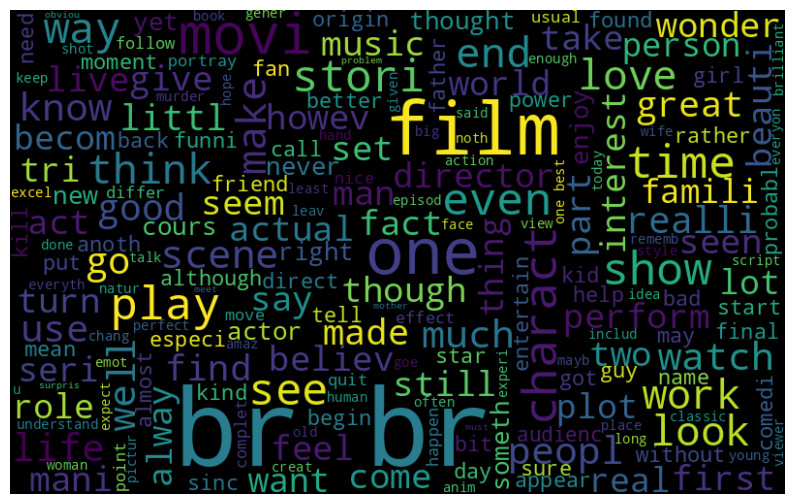

In [45]:
# word cloud for positive review words in the entire dataset
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

#join all the positive reviews
positive_words = ' '.join(list(df[df['sentiment'] == 'positive']['review_cleaned']))

#word cloud for positive words
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

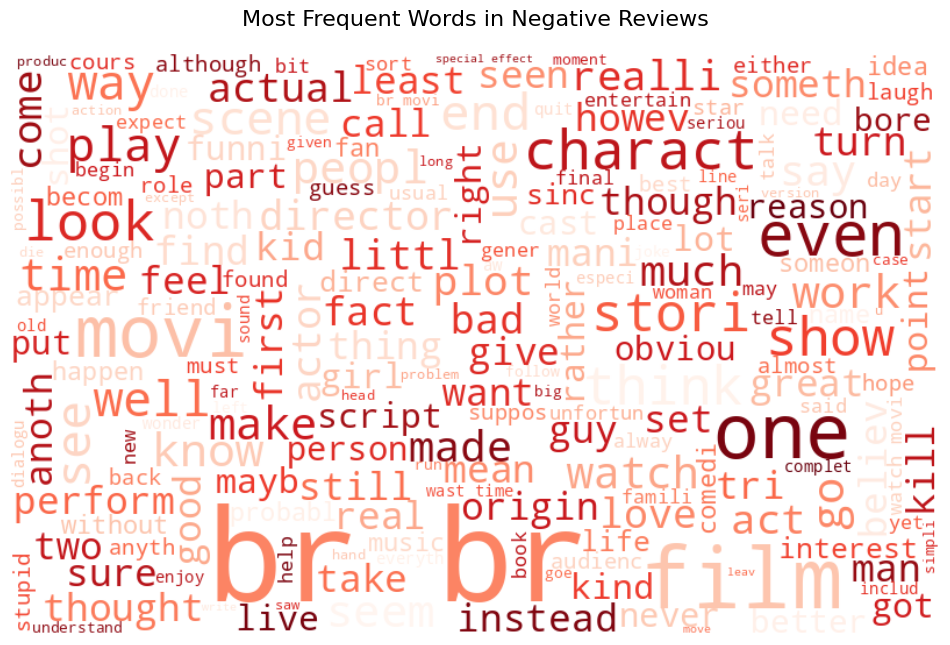

In [46]:
# TODO: Word cloud for negative reviews in the dataset
# Word cloud for negative review words
negative_words = ' '.join(list(df[df['sentiment'] == 'negative']['review_cleaned']))

# Word cloud for negative words
wordcloud_negative = WordCloud(
    width=800,
    height=500,
    random_state=21,
    max_font_size=110,
    background_color='white',
    colormap='Reds'
).generate(negative_words)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis('off')
plt.title('Most Frequent Words in Negative Reviews', fontsize=16, pad=20)
plt.show()

**Step 3:** (Extra Points: Optional!!)
If you are able to complete this step and the remaining ones correctly, we will endorse your data science skills on LinkedIn.

In [48]:
# Detailed evaluation for each classifier
from sklearn.metrics import classification_report

classifiers = {
    'Logistic Regression': (lr, lr_predict),
    'Linear SVM': (svm, svm_predict),
    'Neural Network': (nn_model, nn_predict),
    'Naive Bayes': (mnb_bow, mnb_bow_predict)
}

for name, (classifier, predictions) in classifiers.items():
    print(f"\n{name} - Detailed Classification Report:")
    print("=" * 50)
    print(classification_report(lb_test_sentiments, predictions, target_names=lb.classes_))


Logistic Regression - Detailed Classification Report:
              precision    recall  f1-score   support

    negative       0.90      0.89      0.89      4993
    positive       0.89      0.90      0.90      5007

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000


Linear SVM - Detailed Classification Report:
              precision    recall  f1-score   support

    negative       0.90      0.89      0.89      4993
    positive       0.89      0.90      0.90      5007

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000


Neural Network - Detailed Classification Report:
              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      4993
    positive       0.89      0.90      0.89      5007

    accuracy                   

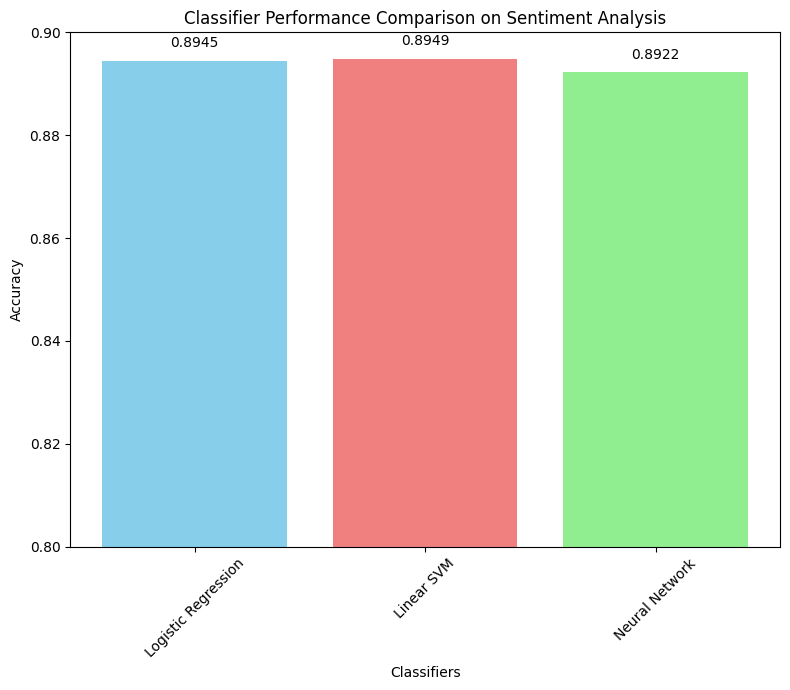

In [57]:
# Visualization of classifier performance
plt.figure(figsize=(8, 7))
classifiers_names = list(classifier_results.keys())
accuracies = list(classifier_results.values())

bars = plt.bar(classifiers_names, accuracies, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.ylim(0.8, 0.9)  # Focus on the range where our accuracies lie
plt.title('Classifier Performance Comparison on Sentiment Analysis')
plt.ylabel('Accuracy')
plt.xlabel('Classifiers')

# Add value labels on bars
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.002,
             f'{accuracy:.4f}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [58]:
# Compare all classifiers to Naive Bayes
classifier_results['Naive Bayes'] = mnb_bow_score

print("\n" + "=" * 60)
print("CLASSIFIER COMPARISON")
print("=" * 60)
for classifier, accuracy in sorted(classifier_results.items(), key=lambda x: x[1], reverse=True):
    print(f"{classifier:20}: {accuracy:.4f} ({accuracy*100:.2f}%)")


CLASSIFIER COMPARISON
Linear SVM          : 0.8949 (89.49%)
Logistic Regression : 0.8945 (89.45%)
Neural Network      : 0.8922 (89.22%)
Naive Bayes         : 0.8848 (88.48%)


Make a visualization of your choice! This is your chance to show your creativity and read about different visualization techniques. You can use the `matplotlib` package to make a visualization of your choice. You can also use the `seaborn` package to make a visualization of your choice.

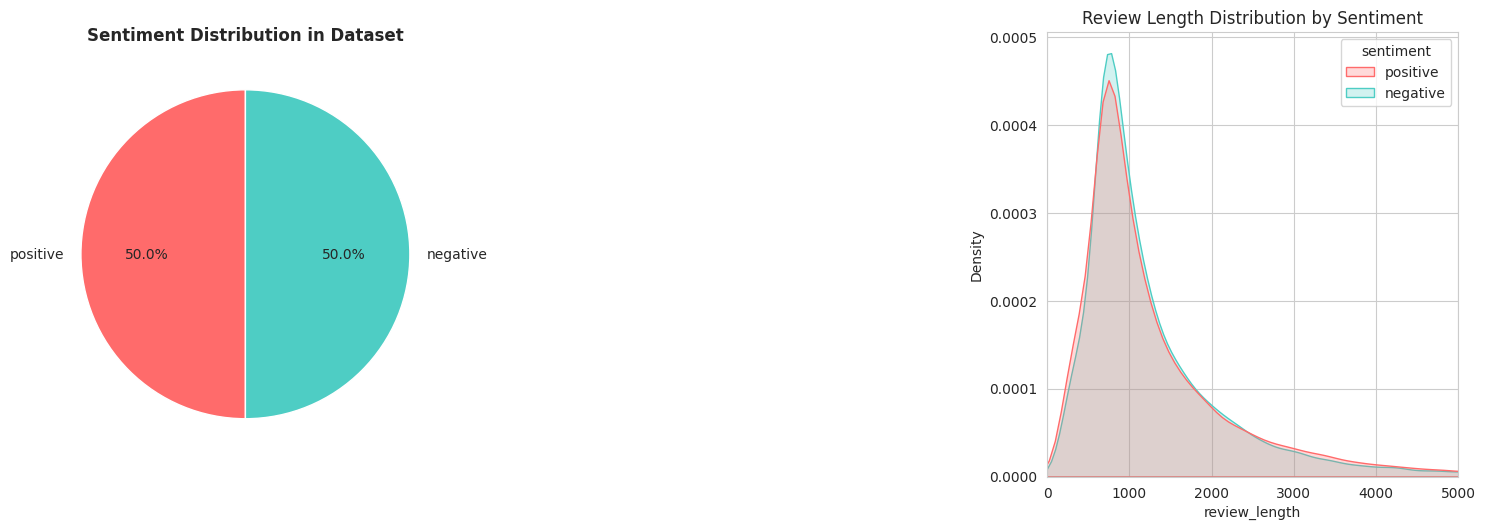

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))

# 1. Sentiment distribution pie chart
plt.subplot(2, 3, 1)
sentiment_counts = df['sentiment'].value_counts()
colors = ['#FF6B6B', '#4ECDC4']  # Red for negative, Teal for positive
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%',
        colors=colors, startangle=90)
plt.title('Sentiment Distribution in Dataset', fontweight='bold')

# 2. Review length distribution (KDE plot)
plt.subplot(2, 3, 3)
sns.kdeplot(data=df, x='review_length', hue='sentiment', palette=colors, fill=True)
plt.title('Review Length Distribution by Sentiment')
plt.xlim(0, 5000)  # Limit to see the main distribution

plt.tight_layout()
plt.show()

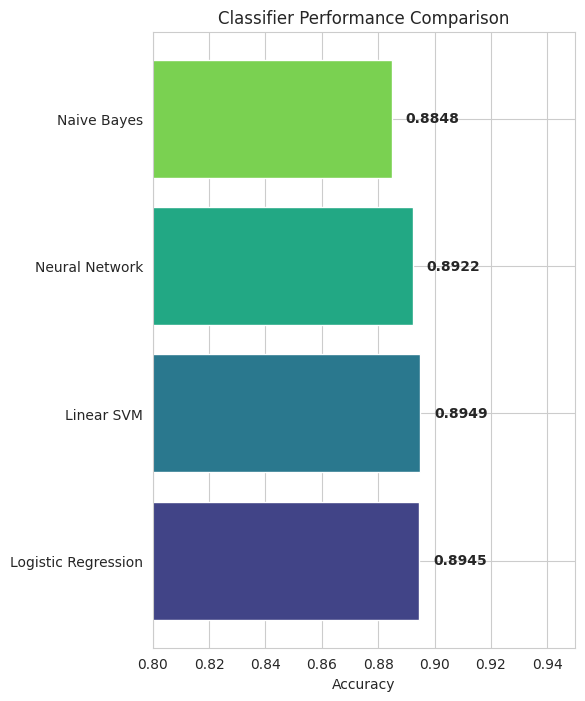

In [62]:
plt.figure(figsize=(12, 8))
classifiers = list(classifier_results.keys())
accuracies = list(classifier_results.values())
colors = sns.color_palette("viridis", len(classifiers))

plt.subplot(1, 2, 1)
bars = plt.barh(classifiers, accuracies, color=colors)
plt.xlabel('Accuracy')
plt.title('Classifier Performance Comparison')
plt.xlim(0.8, 0.95)

# Add value labels
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2,
             f'{accuracy:.4f}', va='center', fontweight='bold')


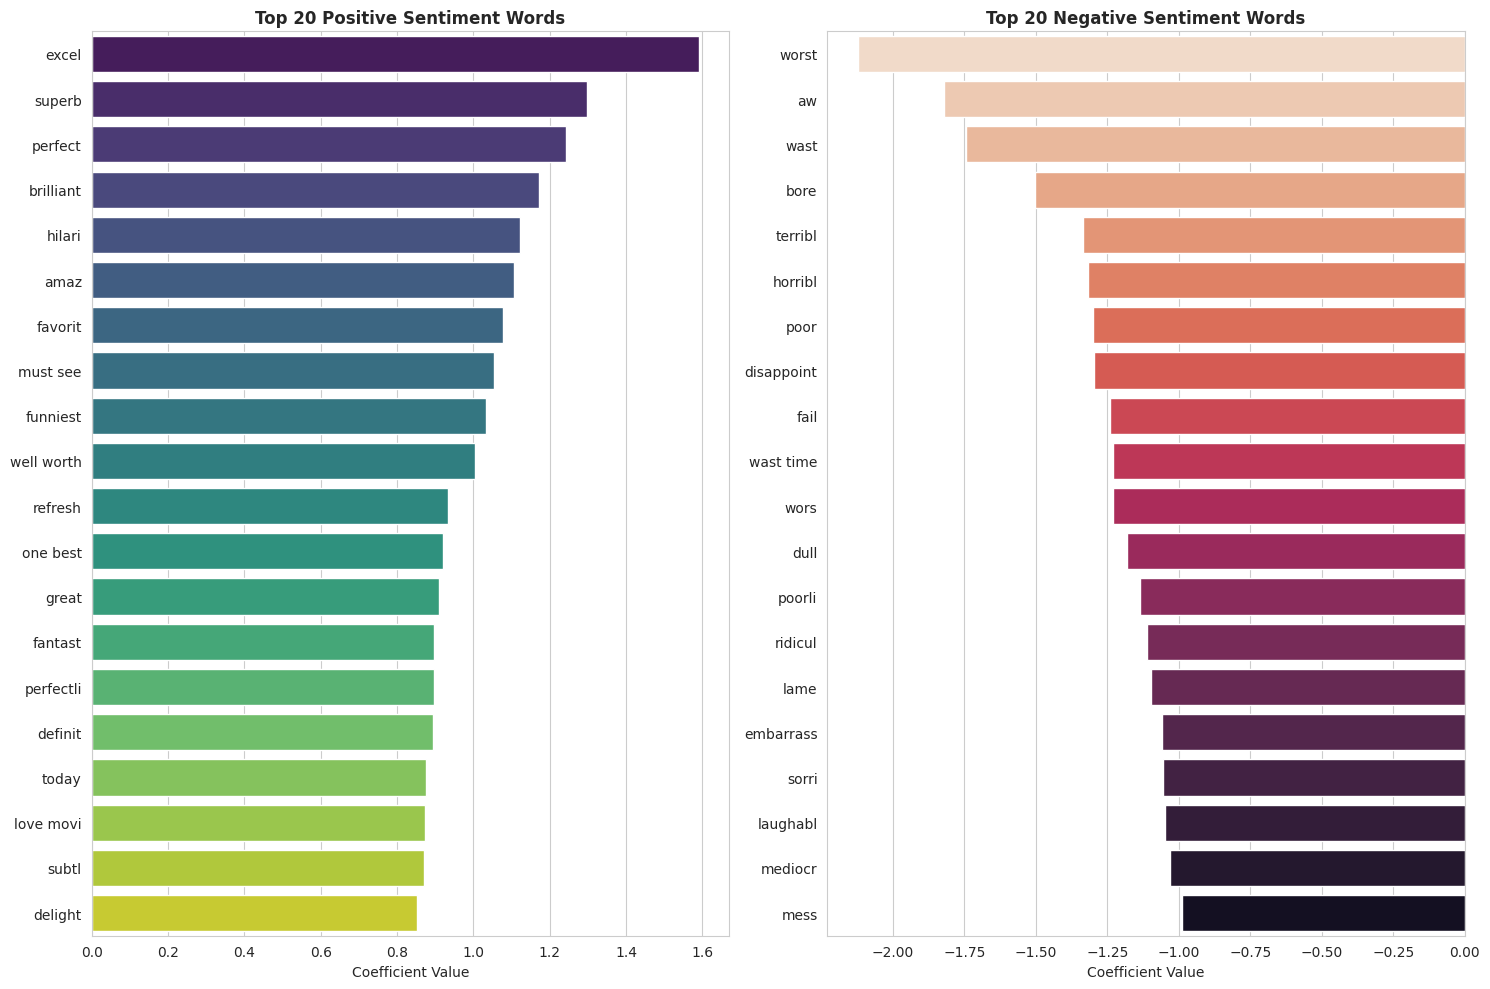

In [63]:
# Get feature importance from best model
plt.figure(figsize=(15, 10))

# Get feature names and coefficients
feature_names = cv.get_feature_names_out()
coefficients = lr.coef_[0]  # Logistic Regression coefficients

# Get top 20 positive and negative words
top_positive_indices = coefficients.argsort()[-20:][::-1]
top_negative_indices = coefficients.argsort()[:20]

top_positive_words = [feature_names[i] for i in top_positive_indices]
top_positive_scores = [coefficients[i] for i in top_positive_indices]

top_negative_words = [feature_names[i] for i in top_negative_indices]
top_negative_scores = [coefficients[i] for i in top_negative_indices]

# Plot positive words
plt.subplot(1, 2, 1)
sns.barplot(x=top_positive_scores, y=top_positive_words, hue=top_positive_words, palette='viridis', legend=False)
plt.title('Top 20 Positive Sentiment Words', fontweight='bold')
plt.xlabel('Coefficient Value')

# Plot negative words
plt.subplot(1, 2, 2)
sns.barplot(x=top_negative_scores, y=top_negative_words, hue=top_negative_words, palette='rocket_r', legend=False)
plt.title('Top 20 Negative Sentiment Words', fontweight='bold')
plt.xlabel('Coefficient Value')

plt.tight_layout()
plt.show()

---
---

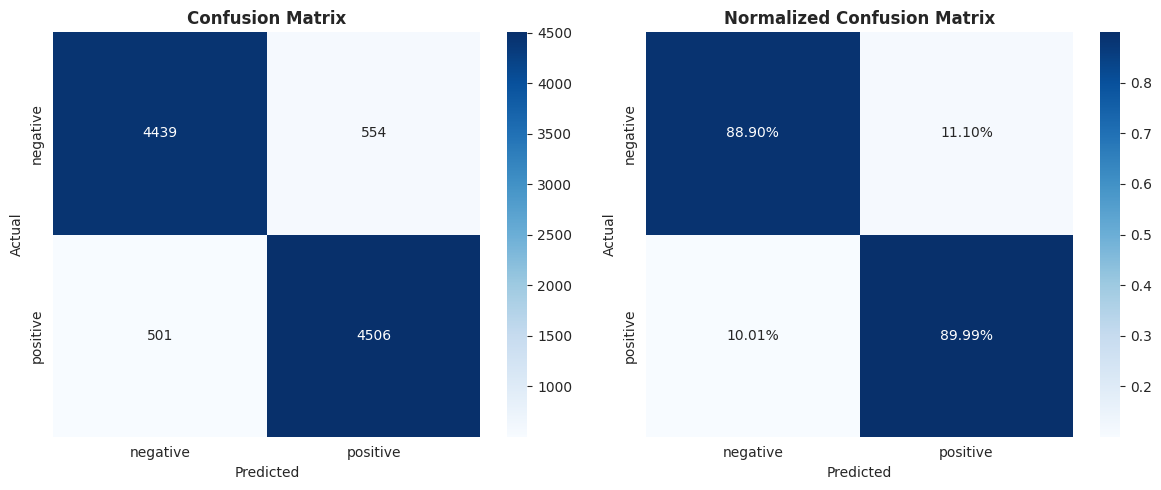

In [64]:
# Comprehensive confusion matrix visualization
from sklearn.metrics import confusion_matrix

# Get predictions from your best model
best_predictions = lr_predict  # or svm_predict_fixed if SVM was better

plt.figure(figsize=(12, 5))

# Standard confusion matrix
plt.subplot(1, 2, 1)
cm = confusion_matrix(lb_test_sentiments, best_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=lb.classes_, yticklabels=lb.classes_)
plt.title('Confusion Matrix', fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Normalized confusion matrix
plt.subplot(1, 2, 2)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues',
            xticklabels=lb.classes_, yticklabels=lb.classes_)
plt.title('Normalized Confusion Matrix', fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

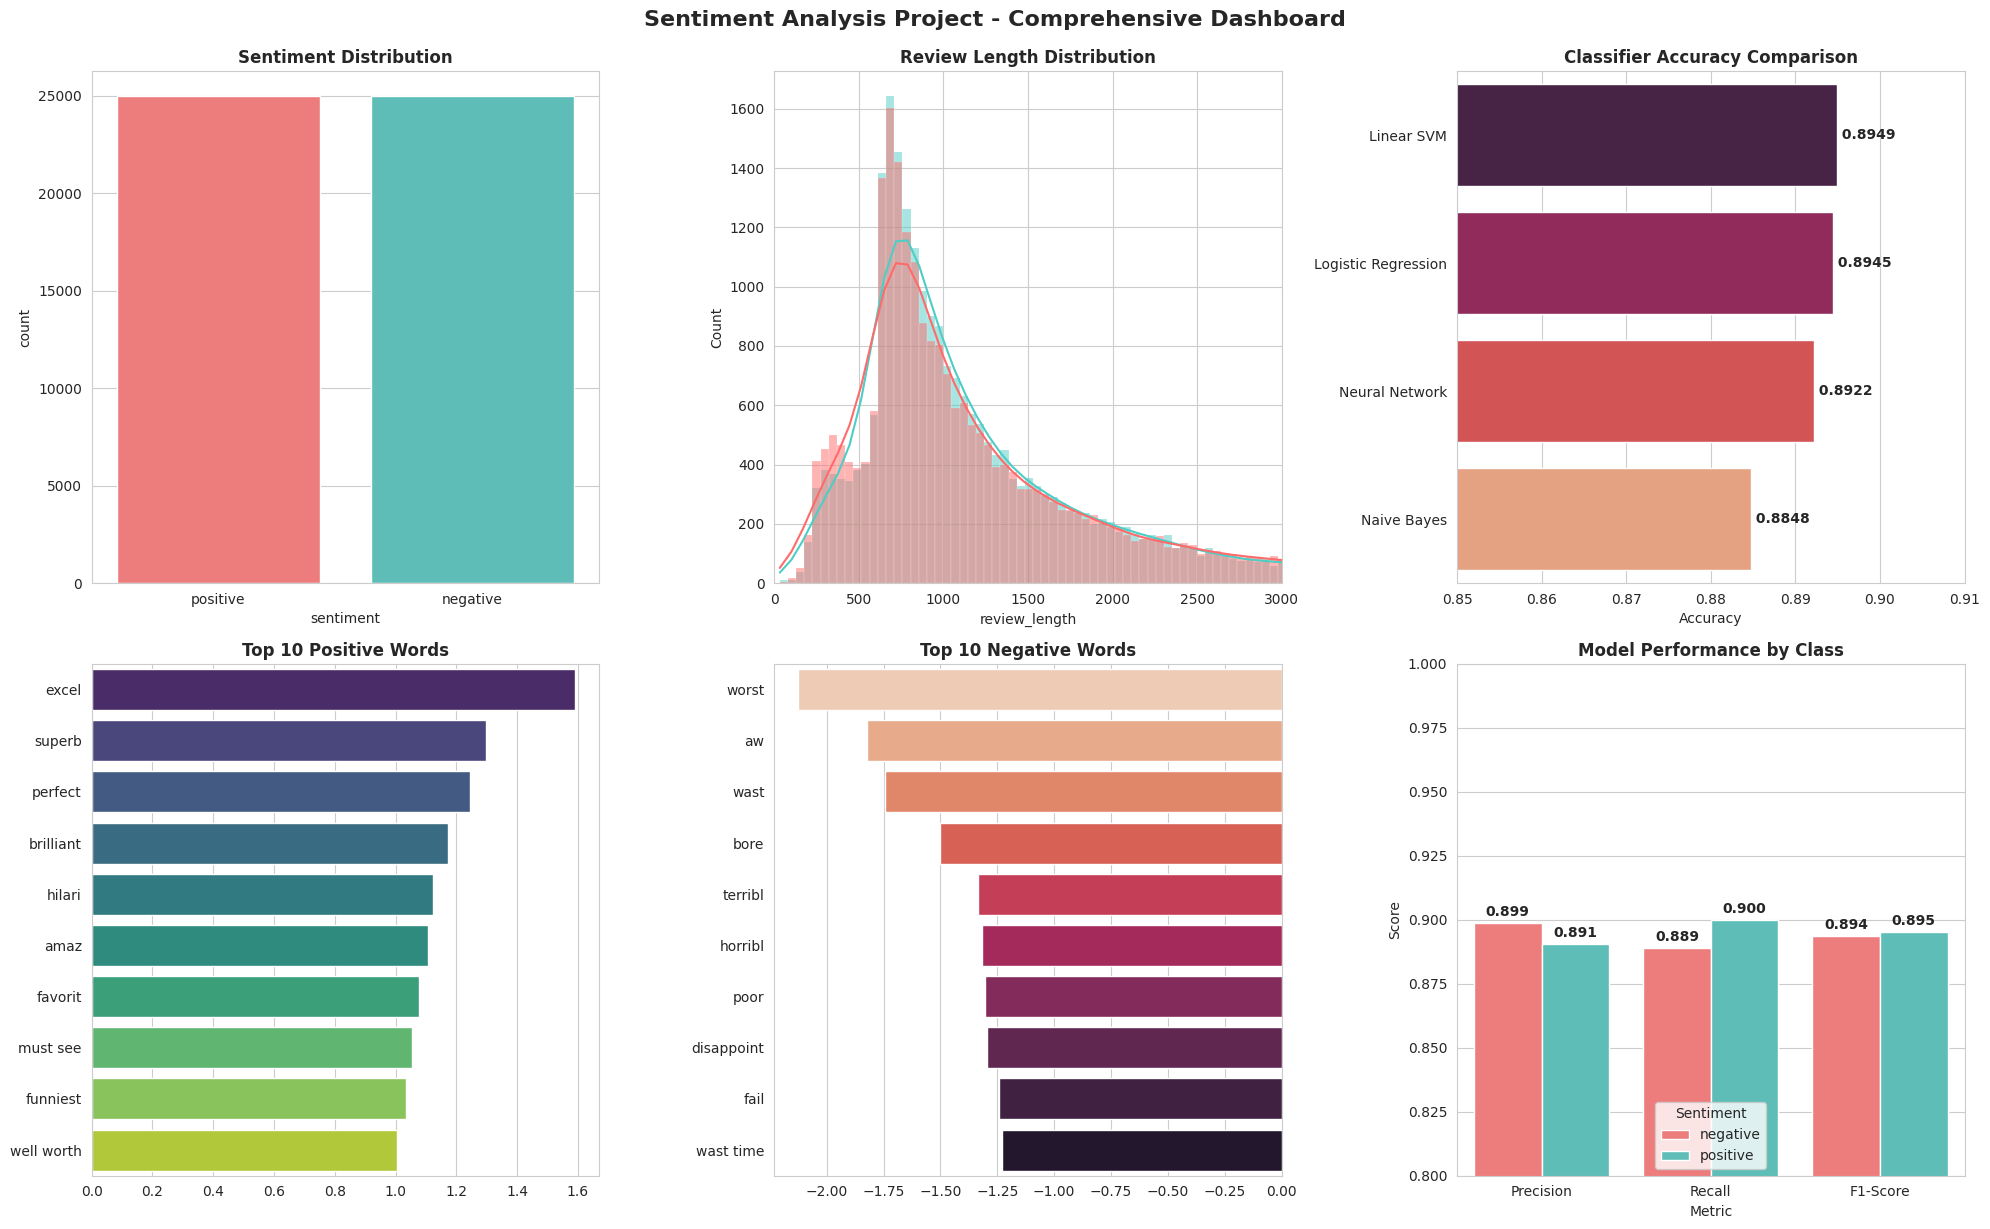

In [70]:
# Final comprehensive dashboard
fig = plt.figure(figsize=(20, 12))

# Define a specific color palette for sentiment plots
sentiment_colors = ['#FF6B6B', '#4ECDC4'] # Red for negative, Teal for positive

# 1. Sentiment distribution
plt.subplot(2, 3, 1)
sns.countplot(data=df, x='sentiment', hue='sentiment', palette=sentiment_colors, legend=False)
plt.title('Sentiment Distribution', fontweight='bold')

# 2. Review length distribution
plt.subplot(2, 3, 2)
sns.histplot(data=df, x='review_length', hue='sentiment', kde=True, palette=sentiment_colors, legend=False)
plt.title('Review Length Distribution', fontweight='bold')
plt.xlim(0, 3000)

# 3. Classifier performance (Improved)
plt.subplot(2, 3, 3)
# Sort results for better comparison
sorted_classifiers = sorted(classifier_results.items(), key=lambda x: x[1], reverse=True)
names = [x[0] for x in sorted_classifiers]
values_acc = [x[1] for x in sorted_classifiers]

ax = sns.barplot(x=values_acc, y=names, hue=names, palette='rocket', legend=False)
plt.title('Classifier Accuracy Comparison', fontweight='bold')
plt.xlabel('Accuracy')
plt.xlim(0.85, 0.91)  # Zoom in to show differences

# Add labels to the bars
for i, v in enumerate(values_acc):
    ax.text(v, i, f' {v:.4f}', va='center', fontweight='bold')

# 4. Feature importance (top 10)
plt.subplot(2, 3, 4)
top_10_pos = list(zip(top_positive_words[:10], top_positive_scores[:10]))
words, scores = zip(*top_10_pos)
sns.barplot(x=list(scores), y=list(words), hue=list(words), palette='viridis', legend=False)
plt.title('Top 10 Positive Words', fontweight='bold')

# 5. Feature importance (bottom 10)
plt.subplot(2, 3, 5)
top_10_neg = list(zip(top_negative_words[:10], top_negative_scores[:10]))
words, scores = zip(*top_10_neg)
sns.barplot(x=list(scores), y=list(words), hue=list(words), palette='rocket_r', legend=False)
plt.title('Top 10 Negative Words', fontweight='bold')

# 6. Performance metrics (Improved: Per-class breakdown)
plt.subplot(2, 3, 6)
from sklearn.metrics import precision_recall_fscore_support
import pandas as pd

# Get metrics for each class
precision_cls, recall_cls, f1_cls, _ = precision_recall_fscore_support(lb_test_sentiments, best_predictions, average=None)
classes = lb.classes_

# Create data for plotting
metrics_data = {
    'Metric': ['Precision', 'Precision', 'Recall', 'Recall', 'F1-Score', 'F1-Score'],
    'Class': [classes[0], classes[1], classes[0], classes[1], classes[0], classes[1]],
    'Score': [precision_cls[0], precision_cls[1], recall_cls[0], recall_cls[1], f1_cls[0], f1_cls[1]]
}
metrics_df = pd.DataFrame(metrics_data)

# Grouped bar plot
ax2 = sns.barplot(data=metrics_df, x='Metric', y='Score', hue='Class', palette=sentiment_colors)
plt.title('Model Performance by Class', fontweight='bold')
plt.ylim(0.8, 1.0) # Zoom in to relevant range
plt.legend(loc='lower center', title='Sentiment')

# Add labels
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.3f', padding=3, fontweight='bold')

plt.tight_layout()
plt.suptitle('Sentiment Analysis Project - Comprehensive Dashboard',
             fontsize=16, fontweight='bold', y=1.02)
plt.show()

<h3 align = 'center' >
Thank you for completing the project!
</h3>

Please do reach out to us if you have any questions or concerns. We are here to help you learn and grow.

If you have any queries, please contact the NSDC HQ Team at nsdc@nebigdatahub.org.
